In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import json

Importing the inactive well data downloaded from AER website and keeping columns with necessary info. 

In [273]:
file = "AER_inactive.csv"
data = pd.read_csv(file, encoding='ISO-8859-1', header = None)
data.drop([0,1,2],axis = 0, inplace = True) # dropping the first row in order to assign new header
header_inactive = ['0','LICENSE_NO','COMPANY','UWI','LSD','FIELD_AREA','LICENSE_STATUS','FINAL_DRILL_DATE','LAST_ACTIVITY_DATE','INACTIVE_STATUS_DATE','SUSPENSION_DATE','INSPECTION_DATE','NEXT_INSPECTION_DATE','DOWNHOLE_OPERATION','WELL_TYPE','AER_RISK_CLASS','MEDIUM_RISK_TYPE_6','COMPLIANCE','NON_COMPLAINCE_DETAIL','IWCP','EXCLUSION_REASON']

data.columns = header_inactive
data_inactive = data[['LICENSE_NO','COMPANY','UWI','LSD','FIELD_AREA','LICENSE_STATUS','FINAL_DRILL_DATE','LAST_ACTIVITY_DATE','INACTIVE_STATUS_DATE','SUSPENSION_DATE','INSPECTION_DATE','NEXT_INSPECTION_DATE','DOWNHOLE_OPERATION','WELL_TYPE','AER_RISK_CLASS','MEDIUM_RISK_TYPE_6','COMPLIANCE','NON_COMPLAINCE_DETAIL','IWCP','EXCLUSION_REASON']].reset_index(drop = True)
data_inactive.head()
# data_inactive.to_csv('AER_inactive.csv')

C:\Users\siava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LICENSE_NO                        COMPANY                  UWI  \
0    0000012  ACCEL Canada Holdings Limited  00/08-17-057-21W4/0   
1    0000016  ACCEL Canada Holdings Limited  00/13-32-057-21W4/0   
2    0000052  ACCEL Canada Holdings Limited  00/02-20-057-21W4/0   
3    0000055       Benson, Keith And Jessie  02/03-16-017-13W4/0   
4    0000079                 NEP Canada ULC  00/16-08-050-26W4/2   

             LSD    FIELD_AREA LICENSE_STATUS FINAL_DRILL_DATE  \
0   8-17-57-21W4    ST. ALBERT     Suspension      29-Jun-1949   
1  13-32-57-21W4    ST. ALBERT     Suspension      29-Jun-1949   
2   2-20-57-21W4    ST. ALBERT     Suspension      01-Jul-1949   
3   3-16-17-13W4  MEDICINE HAT         Issued      20-Jun-1949   
4   16-8-50-26W4    ST. ALBERT     Suspension      17-Jul-1949   

  LAST_ACTIVITY_DATE INACTIVE_STATUS_DATE SUSPENSION_DATE INSPECTION_DATE  \
0        31-May-1990          31-May-1991     31-May-1991     10-Sep-2017   
1        30-Sep-2015          30-Sep-2016     26-Jul-2016     29-Oct-2019   
2        30-Sep-2004          30-Sep-2005     30-Sep-2005     23-Sep-2015   
3                NaN          30-Jun-1950             NaN             NaN   
4        30-Apr-2013          30-Apr-2014     19-Oct-2015     01-Nov-2019   

  NEXT_INSPECTION_DATE            DOWNHOLE_OPERATION  \
0          10-Sep-2022  Bridge Plug capped w/ cement   
1          29-Oct-2020                          None   
2          23-Sep-2020  Bridge Plug capped w/ cement   
3                  NaN                                 
4          01-Nov-2020                          None   

                                           WELL_TYPE AER_RISK_CLASS  \
0                    Suspended greater than 10 years         Medium   
1  Non-flowing Oil Wells with an H2S content < 50...            Low   
2                    Suspended greater than 10 years         Medium   
3                                                            Medium   
4  Non-flowing Oil Wells with an H2S content < 50...            Low   

  MEDIUM_RISK_TYPE_6 COMPLIANCE NON_COMPLAINCE_DETAIL IWCP  \
0                Yes  Compliant                   NaN   No   
1                 No  Compliant                   NaN   No   
2                Yes  Compliant                   NaN   No   
3                Yes        NaN                   NaN   No   
4                 No  Compliant                   NaN  Yes   

           EXCLUSION_REASON  
0                       NaN  
1                       NaN  
2                       NaN  
3  Farm/Domestic/Water Well  
4                       NaN

Let's visualize the data and see the risk categories of inactive wells in Alberta.

Text(0, 0.5, 'Frequency')

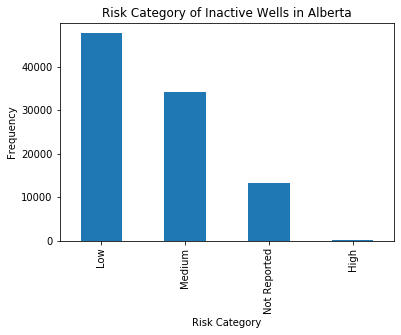

In [233]:

ax = data_inactive['AER_RISK_CLASS'].value_counts().plot(kind='bar',
                                    figsize=(6,4),
                                    title="Risk Category of Inactive Wells in Alberta")
ax.set_xlabel("Risk Category")
ax.set_ylabel("Frequency")

Compliance of Alberta inactive wells

Text(0, 0.5, 'Frequency')

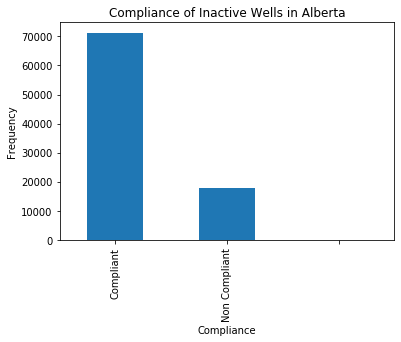

In [31]:
ax = data_inactive['COMPLIANCE'].value_counts().plot(kind='bar',
                                    figsize=(6,4),
                                    title="Compliance of Inactive Wells in Alberta")
ax.set_xlabel("Compliance")
ax.set_ylabel("Frequency")

Top 20 companies bassed on their number of inactive wells 

Text(0, 0.5, 'Frequency')

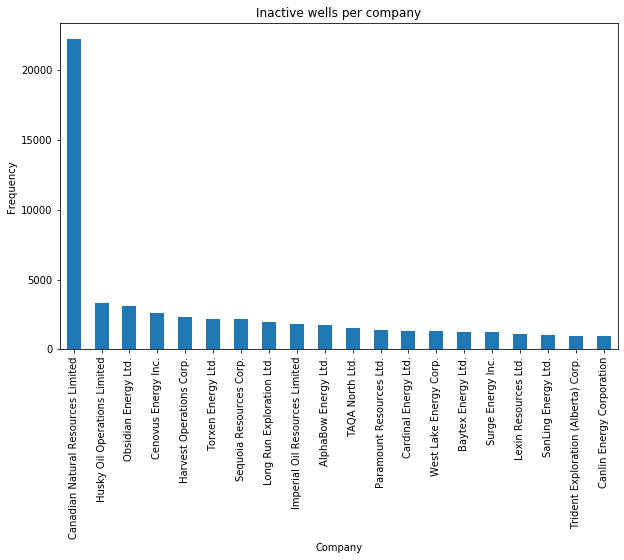

In [29]:
ax = data_inactive['COMPANY'].value_counts().head(20).plot(kind='bar',
                                    figsize=(10,6),
                                    title="Inactive wells per company")
ax.set_xlabel("Company")
ax.set_ylabel("Frequency")

Now we are interested to know what companies have the lowest risk levels for their inactive wells. Since the 'High' risk category is insignificant, we only consider 'Low' and 'Medium' risk categories and binzarize them to 0 and 1 respectively. Finally, we group the list by companies and average the risk level and create a bar plot. 

In [299]:
inactive_low_medium =  data_inactive[(data_inactive['AER_RISK_CLASS'] == 'Low') | (data_inactive['AER_RISK_CLASS'] == 'Medium')]
# replacing 'Low' 0 and 'Medium' with 1
inactive_low_medium['AER_RISK_CLASS'] = inactive_low_medium['AER_RISK_CLASS'].replace(to_replace=['Low', 'Medium'], value=[0, 1])

counts = pd.DataFrame(inactive_low_medium['COMPANY'].value_counts()).reset_index()
counts = counts.rename(columns = {'index':'COMPANY','COMPANY':'NUMBER'})
average = pd.DataFrame(inactive_low_medium.groupby('COMPANY')['AER_RISK_CLASS'].mean())

merged = counts.merge(average, on=['COMPANY'], how='inner')
merged[merged['NUMBER']>500].sort_values(by = 'AER_RISK_CLASS', ascending = False)

C:\Users\siava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


COMPANY  NUMBER  AER_RISK_CLASS
32                      Domestic Water Well     528        1.000000
26      Trident Exploration (Alberta) Corp.     617        0.677472
27                       Razor Energy Corp.     616        0.628247
13                 Paramount Resources Ltd.    1176        0.620748
33                    Bonterra Energy Corp.     528        0.590909
21                      SanLing Energy Ltd.     758        0.585752
10                     AlphaBow Energy Ltd.    1318        0.551593
20                     Ember Resources Inc.     762        0.548556
25             Sinopec Daylight Energy Ltd.     623        0.536116
8            Imperial Oil Resources Limited    1497        0.530394
36                     Tourmaline Oil Corp.     507        0.522682
15                        Surge Energy Inc.    1146        0.506981
34                      Journey Energy Inc.     516        0.501938
2                      Obsidian Energy Ltd.    2803        0.498751
11                     Cardinal Energy Ltd.    1254        0.477671
24  Prairie Provident Resources Canada Ltd.     716        0.430168
23                    NAL Resources Limited     735        0.423129
7                 Long Run Exploration Ltd.    1831        0.419989
29                Canlin Energy Corporation     599        0.397329
31               Tamarack Acquisition Corp.     568        0.394366
5                   Sequoia Resources Corp.    2164        0.384011
17                       ARC Resources Ltd.     812        0.383005
0        Canadian Natural Resources Limited   20834        0.360948
19                   Pine Cliff Energy Ltd.     809        0.358467
3                  Harvest Operations Corp.    2204        0.355263
1              Husky Oil Operations Limited    2831        0.352526
9                           TAQA North Ltd.    1401        0.348323
14                       Baytex Energy Ltd.    1157        0.331029
4                       Cenovus Energy Inc.    2164        0.329945
16                          Ipc Canada Ltd.     866        0.329099
35                           Cor4 Oil Corp.     509        0.298625
12                   West Lake Energy Corp.    1244        0.286174
30              Crescent Point Energy Corp.     578        0.249135
6                        Torxen Energy Ltd.    2045        0.239120
28                        Karve Energy Inc.     605        0.181818
18             Bonavista Energy Corporation     811        0.171393
22                         Gear Energy Ltd.     738        0.144986

In [246]:
inactive_low_medium.shape

(81793, 20)

Let's merge these 100 companies with the low_medium data frame and obtain the coordinates using the ATS_V4_1.seq file downloaded from Atlasgrid

In [93]:
lowest_risk_inactive = inactive_low_medium.merge(lowest_risk_companies, on=['COMPANY'], how='inner')
lowest_risk_inactive.shape

(773, 21)

In [95]:
input = open('ATS_V4_1.seq', "r")
text = input.read()
text_lst = text.split('\n')
text_lst[0]

'40100101E449.00701238110.0050793319840621S07LBD         1421   0.000000000    199104030000000020050331113922'

ATS System sub division is ranged from 1 to 16. However, this file from Altalist has subdivisions of 'CS', 'NW', N4', 'NE', 'E4', 'SW', 'S4', 'W4'. So we need to convert these to numbers in order to read the AER LSDs from data_inactive.csv and their coordinates.

It may take a few minutes to run this cell.

In [96]:
def qsection_to_lsd(str):
    '''
    converts to lsd based on AER table 
    return a list
    '''
    
    if str == 'CS':
        lsd = [11,10,6,7]   
        return lsd
    if str == 'NW':
        lsd = [13]
        return lsd
    if str == 'N4':
        lsd = [14,15]
        return lsd
    if str == 'NE':
        lsd = [16]
        return lsd
    if str == 'E4':
        lsd = [8,9]
        return lsd
    if str == 'SW':
        lsd = [4]
        return lsd
    if str == 'S4':
        lsd = [2, 3]
        return lsd
    if str == 'W4':
        lsd = [5,12]
        return lsd
    
coordinates = []
            
for line in text_lst:
    try:
        twnship = int(line[3:6])
        range = int(line[1:3])
        sec = int(line[6:8])
        qsec = qsection_to_lsd(line[8:10])
        lat = line[10:21]
        lng = line[21:32]
        
        for lsd in qsec:
            LSD = str(lsd) + '-' + str(sec)+ '-' + str(twnship) + '-' + str(range) + 'W' + line[0]
            coordinates.append([LSD,'-'+lng,lat])
    except:
        LSD,lng,lat,sec = ("","","","")    

In [101]:
df_coordinates = pandas.DataFrame(coordinates)
df_coordinates.columns = ['LSD','LONGITUDE', 'LATITUDE']
df_coordinates.head()

LSD     LONGITUDE     LATITUDE
0   8-1-1-1W4  -110.0050793  49.00701238
1   9-1-1-1W4  -110.0050793  49.00701238
2  14-1-1-1W4  -110.0161551  49.01415809
3  15-1-1-1W4  -110.0161551  49.01415809
4  16-1-1-1W4  -110.0050807  49.01424023

When we changed the quarter sections to numbers, some LSDs may have been skipped. As a result, the function below takes in a LSD and return the nearest LSD if that LSD does not exist in our data frame

In [98]:
def nearest_coordinates(str):
    '''
    searches for other LSDs and pick the nearest subdivision and pick the corresponding LSD
    returns a string
    '''
    qsec_lsd_dict = {}
    if str not in df_coordinates['LSD']:
        lsd_split = str.split('-', 1)
        coordinates_numpy = df_coordinates[df_coordinates['LSD'].str.contains(lsd_split[1])].to_numpy()
        for geo_dat in coordinates_numpy:
            qsec = int(geo_dat[0].split('-',1)[0])
            qsec_dif_val = abs(qsec - int(lsd_split[0]))
            qsec_lsd_dict[geo_dat[0]] = qsec_dif_val
        nearest_lsd_dif = min(qsec_lsd_dict.values())
        nearest_lsd = list(qsec_lsd_dict.keys())[list(qsec_lsd_dict.values()).index(nearest_lsd_dif)]
        return nearest_lsd 
    
    else:
        nearest_lsd = str
        return nearest_lsd

In [99]:
def lsd_to_coordinates(df):
    '''
    converts the LSDs of a dataframe to coordinates: longitude and latitide
    returns a data frame
    '''

    lsd_coordinates_lst = []
    lsd_lst = df['LSD'].to_list()
    for lsd in lsd_lst: 
        coordinates_array = df_coordinates[df_coordinates['LSD'] == nearest_coordinates(lsd)].to_numpy()[0][1:]
        lsd_coordinates_lst.append(coordinates_array)
    lsd_coordinates_df = pandas.DataFrame(lsd_coordinates_lst)
    lsd_coordinates_df.head()
    return lsd_coordinates_df

Now that we have defined all functions, let's convert the LSDs of top 100 companies with lowest risk levels to coordinates in order to visualize them on a map.

This may take a while to run.

In [102]:
inactive_coordinates = lsd_to_coordinates(lowest_risk_inactive)

In [103]:
inactive_coordinates

0            1
0    -112.8106686  49.06478541
1    -112.8106857  49.05013432
2    -112.8106857  49.05013432
3    -110.5803434  54.13702023
4    -110.2956178  54.44231304
..            ...          ...
768  -111.7105565  50.17184248
769  -112.1124496  50.31734057
770  -111.7230316  50.37559395
771  -111.7459542  50.39010754
772  -114.7535262  56.87932640

[773 rows x 2 columns]

In [107]:
lowest_risk_inactive['LONGITUDE'], lowest_risk_inactive['LATITUDE'] = inactive_coordinates[0], inactive_coordinates[1]

lowest_risk_inactive.head()

LICENSE_NO             COMPANY                  UWI           LSD  \
0    0001505  Edalis Energy Inc.  00/01-25-001-22W4/0   1-25-1-22W4   
1    0003061  Edalis Energy Inc.  00/09-24-001-22W4/0   9-24-1-22W4   
2    0121344  Edalis Energy Inc.  00/10-24-001-22W4/0  10-24-1-22W4   
3    0004888  DEL Canada GP Ltd.  00/16-30-059-04W4/0  16-30-59-4W4   
4    0028934  DEL Canada GP Ltd.  00/12-07-063-02W4/0   12-7-63-2W4   

     FIELD_AREA LICENSE_STATUS FINAL_DRILL_DATE LAST_ACTIVITY_DATE  \
0  MEDICINE HAT     Suspension      17-Aug-1950        30-Sep-2014   
1  MEDICINE HAT     Suspension      12-Mar-2003        31-Oct-2017   
2  MEDICINE HAT     Suspension      01-Feb-1986        31-Jul-2016   
3    BONNYVILLE     Suspension      09-Jul-1952        30-Jun-2018   
4    BONNYVILLE     Suspension      15-Sep-1965        31-Jul-2017   

  INACTIVE_STATUS_DATE SUSPENSION_DATE  ...  \
0          30-Sep-2015     30-Sep-2015  ...   
1          31-Oct-2015     31-Oct-2015  ...   
2          31-Jul-2017     31-Jul-2017  ...   
3          30-Jun-2019     23-Jan-2020  ...   
4          31-Jul-2018     29-Jan-2020  ...   

                                           WELL_TYPE AER_RISK_CLASS  \
0  Non-flowing Oil Wells with an H2S content < 50...              0   
1  Non-flowing Oil Wells with an H2S content < 50...              0   
2  Non-flowing Oil Wells with an H2S content < 50...              0   
3  Gas Wells < 28000 m3/Day that are low risk as ...              0   
4  Gas Wells < 28000 m3/Day that are low risk as ...              0   

  MEDIUM_RISK_TYPE_6     COMPLIANCE  NON_COMPLAINCE_DETAIL IWCP  \
0                 No      Compliant                    NaN   No   
1                 No      Compliant                    NaN   No   
2                 No  Non Compliant  Inspection is overdue   No   
3                 No      Compliant                    NaN   No   
4                 No      Compliant                    NaN   No   

  EXCLUSION_REASON AER_RISK_FACTOR     LONGITUDE     LATITUDE  
0              NaN        0.000000  -112.8106686  49.06478541  
1              NaN        0.000000  -112.8106857  49.05013432  
2              NaN        0.000000  -112.8106857  49.05013432  
3              NaN        0.043478  -110.5803434  54.13702023  
4              NaN        0.043478  -110.2956178  54.44231304  

[5 rows x 23 columns]

To create a choropleth map of these 773 wells, first we need to know what division these coordinates fall into. First, we import shapely package and import the geojson file of Canada divisions.  

In [165]:
from shapely.geometry import Point, Polygon
import shapefile

In [166]:
with open('canada_divisions.geojson') as f:
    data = json.load(f)
poly = {}  
for feature in data['features']:
    name = feature['properties']
    if name['PRNAME'] == 'Alberta':
        poly[name['CDNAME']] = Polygon(feature['geometry']['coordinates'][0])

Now we search in the polygons to see if they contain the well coordinates and calculate how many wells are in each division

In [199]:
for division in poly.keys():
    count[division] = 0
    
for (lon, lat) in zip(lowest_risk_inactive['LONGITUDE'], lowest_risk_inactive['LATITUDE']):
    well_coord = Point(float(lon),float(lat))
    for division in poly.keys():
        if poly[division].contains(well_coord):
            count[division] = count[division] + 1


In [204]:
# convert to a dataframe

inactive_wells_per_division =  pd.DataFrame(count.items(), columns=['DIVISION', 'COUNT'])

inactive_wells_per_division

DIVISION  COUNT
0   Division No. 16     66
1   Division No. 11     60
2   Division No.  2     11
3   Division No.  1     12
4   Division No. 10    131
5   Division No. 15      0
6   Division No.  5     34
7   Division No. 13     11
8   Division No. 14     46
9   Division No.  9     15
10  Division No.  3      5
11  Division No. 18     72
12  Division No.  4     17
13  Division No.  7     65
14  Division No. 12     73
15  Division No. 17    111
16  Division No.  6     10
17  Division No.  8     20
18  Division No. 19     14

Finally we can create a map using the folium. 

<i> The code needs to be modified to only read Alberta coordinates. Right now, it creates a map but does not distinguish between provinces as there are multiple divisions with the same name in different provinces.<i>

In [217]:
alberta_map = folium.Map(location = [53.9333, -116.5765], zoom_start = 6)

alberta_geo = r'canada_divisions.geojson' # geojson file

choropleth = folium.Choropleth(
    geo_data=alberta_geo,
    data=inactive_wells_per_division,
    columns=['DIVISION', 'COUNT'],
    key_on='feature.properties.CDNAME',
    fill_color='YlGnBu', 
    fill_opacity=0.9, 
    line_opacity=0.2,
    legend_name='Inactive Wells Distribution for the Top 100 Companies in Alberta with Lowest Risk Level Well'
    
).add_to(alberta_map)

style_function = "font-size: 10px; font-weight:bold"

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['CDNAME'], style=style_function, labels=False))
# display map
alberta_map

Since the code above does not correctly show the wells in Alberta, we used the coordinates directly to show the locations of inactive wells of the lowest risk wells in Alberta. 

In [215]:
alberta_map = folium.Map(location = [53.9333, -116.5765], zoom_start = 6)

alberta_geo = r'canada_divisions.geojson' # geojson file

wells = plugins.MarkerCluster().add_to(alberta_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(lowest_risk_inactive.LATITUDE, lowest_risk_inactive.LONGITUDE, zip(lowest_risk_inactive['AER_RISK_CLASS'], lowest_risk_inactive['COMPANY'])):
    if lat != '':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
            ).add_to(wells)


# display map
alberta_map